The texts to matrix() function for the Tokenizer in the Keras API provides 4 different
methods for scoring words; they are:

a) binary :- Where words are marked as present (1) or absent (0).        
b) count :- Where the occurrence count for each word is marked as an integer.    
c) tfidf :- Where each word is scored based on their frequency, where words that are common
across all documents are penalized.   
d) freq :- Where words are scored based on their frequency of occurrence within the document.

We are going to compare these 4 different word scoring methods for our sentiment analysis of moview reviews model

The Dataset contains 1000  text files of positive movie reviews in the pos folder and 1000 text files of neg reviews in neg folder.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import string
import re
from os import listdir
from numpy import array
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense
from pandas import DataFrame
from matplotlib import pyplot

Using TensorFlow backend.


In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
!pwd
path = 'drive/My Drive/txt_sentoken/'

/content


In [0]:
# Function to load file into memory
def load_doc(filename):
# open the file as read only
  file = open(filename, 'r')
# read all text
  text = file.read()
# close the file
  file.close()
  return text

In [0]:
#Function to turn a file(containing) into clean tokens(words)
def clean_doc(doc):
# split into tokens by white space
  tokens = doc.split()
# prepare regex for char filtering
  re_punc = re.compile('[%s]' % re.escape(string.punctuation))
# remove punctuation from each word
  tokens = [re_punc.sub('', w) for w in tokens]
# remove remaining tokens that are not alphabetic
  tokens = [word for word in tokens if word.isalpha()]
# filter out stop words
  stop_words = set(stopwords.words('english'))
  tokens = [w for w in tokens if not w in stop_words]
# filter out short tokens
  tokens = [word for word in tokens if len(word) > 1]
  return tokens

In [0]:
#Function to clean a file into a line of clean words by looking at the vocabulary
def doc_to_line(filename, vocab):
# load the doc
  doc = load_doc(filename)
# clean doc
  tokens = clean_doc(doc)
# filter by vocab
  tokens = [w for w in tokens if w in vocab]
  return ' '.join(tokens)

In [0]:
# This function load all text files in a directory and cleans them and gives a list of clean words by looking at the vocabulary
#depending on the is_train argument,the unction will process test and training data

def process_docs(directory, vocab, is_train):
  lines = list()
# walk through all files in the folder
  for filename in listdir(directory):
# skip any reviews in the test set
    if is_train and filename.startswith('cv9'):
      continue
    if not is_train and not filename.startswith('cv9'):
      continue
# create the full path of the file to open
    path = directory + '/' + filename
# load and clean the doc
    line = doc_to_line(path, vocab)
# add to list
    lines.append(line)
  return lines

In [0]:
# load and clean a dataset
def load_clean_dataset(vocab, is_train):
# load documents
  neg = process_docs(path+'neg', vocab, is_train)
  pos = process_docs(path+'pos', vocab, is_train)
  docs = neg + pos
# prepare labels
  labels = array([0 for _ in range(len(neg))] + [1 for _ in range(len(pos))])
  return docs, labels

In [0]:
#define the model
def define_model(n_words):
# define network
  model = Sequential()
  model.add(Dense(50, input_shape=(n_words,), activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
# compile network
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [0]:
#Running each model n_repeat times and taking there average as the real accuracy
def evaluate_mode(Xtrain, ytrain, Xtest, ytest):
  scores = list()
  n_repeats = 10
  n_words = Xtest.shape[1]
  for i in range(n_repeats):
# define network
    model = define_model(n_words)
# fit network
    model.fit(Xtrain, ytrain, epochs=10, verbose=0)
# evaluate
    _, acc = model.evaluate(Xtest, ytest, verbose=0)
    scores.append(acc)
    print('%d accuracy: %s' % ((i+1), acc))
  return scores

In [0]:
#prepare bag of words encoding of docs
def prepare_data(train_docs, test_docs, mode):
# create the tokenizer
  tokenizer = Tokenizer()
# fit the tokenizer on the documents
  tokenizer.fit_on_texts(train_docs)
# encode training data set
  Xtrain = tokenizer.texts_to_matrix(train_docs, mode=mode)
# encode training data set
  Xtest = tokenizer.texts_to_matrix(test_docs, mode=mode)
  return Xtrain, Xtest

In [0]:
# load the vocabulary
vocab_filename = path +'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())
# load all reviews
train_docs, ytrain = load_clean_dataset(vocab, True)
test_docs, ytest = load_clean_dataset(vocab, False)

In [0]:
# run experiment
modes = ['binary', 'count', 'tfidf', 'freq']
results = DataFrame()
for mode in modes:
# prepare data for mode
  Xtrain, Xtest = prepare_data(train_docs, test_docs, mode)
# evaluate model on data for mode
  results[mode] = evaluate_mode(Xtrain, ytrain, Xtest, ytest)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
1 accuracy: 0.935
2 accuracy: 0.94
3 accuracy: 0.94
4 accuracy: 0.93
5 accuracy: 0.94
6 accuracy: 0.945
7 accuracy: 0.93
8 accuracy: 0.93
9 accuracy: 0.935
10 accuracy: 0.92
1 accuracy: 0.885
2 accuracy: 0.89
3 accuracy: 0.89
4 accuracy: 0.9
5 accuracy: 0.9
6 accuracy: 0.9
7 accuracy: 0.895
8 accuracy: 0.895
9 accuracy: 0.905
10 accuracy: 0.895
1 accuracy: 0.86
2 accuracy: 0.875
3 accuracy: 0.885
4 accuracy: 0.9
5 accuracy: 0.89
6 accuracy: 0.87
7 accuracy: 0.885
8 accuracy: 0.87
9 accuracy: 0.87
10 accuracy: 0.88
1 accuracy: 0.87
2 accuracy: 0.87
3 accuracy: 0.88
4 accuracy: 0.875
5 accuracy: 0.88
6 accuracy: 0.88
7 accuracy: 0.875
8 accuracy: 0.865
9 accuracy: 0.86
10 accuracy: 0.875


          binary      count      tfidf       freq
count  10.000000  10.000000  10.000000  10.000000
mean    0.934500   0.895500   0.878500   0.873000
std     0.007246   0.005986   0.011797   0.006749
min     0.920000   0.885000   0.860000   0.860000
25%     0.930000   0.891250   0.870000   0.870000
50%     0.935000   0.895000   0.877500   0.875000
75%     0.940000   0.900000   0.885000   0.878750
max     0.945000   0.905000   0.900000   0.880000


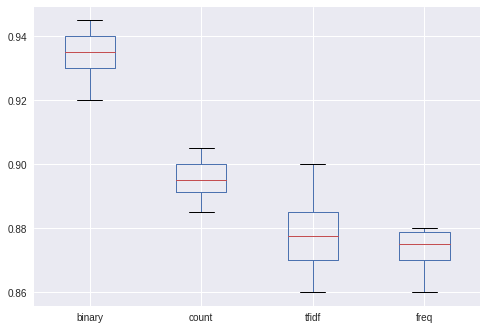

In [0]:
# summarize results
print(results.describe())
# plot results
results.boxplot()
pyplot.show()

# Predicting Sentiment for New Reviews

In [0]:
# load the vocabulary
vocab_filename = path+'vocab.txt'
vocab = load_doc(vocab_filename)
vocab = set(vocab.split())

# load all reviews
train_docs, ytrain = load_clean_dataset(vocab,True)
test_docs, ytest = load_clean_dataset(vocab,False)

# create the tokenizer
tokenizer = Tokenizer()
# fit the tokenizer on the documents
tokenizer.fit_on_texts(train_docs)


# encode data
Xtrain = tokenizer.texts_to_matrix(train_docs, mode='binary')
Xtest = tokenizer.texts_to_matrix(test_docs, mode='binary')


In [0]:
# define network
n_words = Xtrain.shape[1]
model = define_model(n_words)

# fit network
model.fit(Xtrain, ytrain, epochs=10, verbose=2)


Epoch 1/10
 - 4s - loss: 0.4717 - acc: 0.7772
Epoch 2/10
 - 1s - loss: 0.0732 - acc: 0.9884
Epoch 3/10
 - 1s - loss: 0.0206 - acc: 1.0000
Epoch 4/10
 - 1s - loss: 0.0092 - acc: 1.0000
Epoch 5/10
 - 1s - loss: 0.0054 - acc: 1.0000
Epoch 6/10
 - 1s - loss: 0.0035 - acc: 1.0000
Epoch 7/10
 - 1s - loss: 0.0024 - acc: 1.0000
Epoch 8/10
 - 1s - loss: 0.0018 - acc: 1.0000
Epoch 9/10
 - 1s - loss: 0.0013 - acc: 1.0000
Epoch 10/10
 - 1s - loss: 0.0010 - acc: 1.0000


In [0]:
# test positive text
text = 'Best movie ever! It was great, I recommend it.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

# test negative text
text = 'This is a bad movie.'
percent, sentiment = predict_sentiment(text, vocab, tokenizer, model)
print('Review: [%s]\nSentiment: %s (%.3f%%)' % (text, sentiment, percent*100))

Review: [Best movie ever! It was great, I recommend it.]
Sentiment: POSITIVE (57.387%)
Review: [This is a bad movie.]
Sentiment: NEGATIVE (65.761%)
